In [1]:
#1. Get a rough idea of the data
# Import necessary libraries
from sequenzo import *  # Sequenzo package
import pandas as pd     # Data manipulation
# from sequenzo.utils import assign_unique_ids


In [2]:
#import pandas as pd
df = pd.read_csv('D:/college/research/QiQi/sequenzo/files/orignal data/sohee/sequence_data.csv')
df

,PID,25m01,25m02,25m03,25m04,25m05,25m06,25m07,25m08,25m09,...,35m05,35m06,35m07,35m08,35m09,35m10,35m11,35m12,race,sex
0,2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,3,2
1,3,6.0,6.0,6.0,5.0,5.0,5.0,1.0,1.0,1.0,...,6.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,3,2
2,4,5.0,5.0,6.0,1.0,1.0,1.0,1.0,1.0,1.0,...,6.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3,2
3,6,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3,1
4,8,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6571,12515,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2,2
6572,12516,6.0,6.0,6.0,6.0,5.0,6.0,6.0,2.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2
6573,12517,2.0,2.0,2.0,2.0,2.0,2.0,2.0,6.0,6.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2,1
6574,12558,5.0,5.0,5.0,5.0,6.0,5.0,6.0,3.0,6.0,...,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,2,2


In [3]:
# df = assign_unique_ids(df, id_col_name='Entity ID')

time_list = list(df.columns)[1:121]
states = [1.0,2.0,3.0,4.0,5.0,6.0]
labels = ['FT+WC', 'FT+BC', 'PT+WC','PT+BC', 'U', 'OLF']
sequence_data = SequenceData(df, time=time_list, time_type = "age", states=states, labels = labels, id_col="PID")

sequence_data

[!] Detected missing values (empty cells) in the sequence data.
    → Automatically added np.nan to `states` and `labels` for compatibility.
    However, it's strongly recommended to manually include it when defining `states` and `labels`.
    For example:

        states = [At Home, Left Home, np.nan]
        labels = [At Home, Left Home, Missing]

    This ensures consistent color mapping and avoids unexpected visualization errors.

[>] SequenceData initialized successfully! Here's a summary:
[>] Number of sequences: 6576
[>] Number of time points: 120
[>] Min/Max sequence length: 15 / 120
[>] There are 4354 missing values across 472 sequences.
    First few missing sequence IDs: [11, 33, 82, 95, 141, 144, 150, 156, 229, 253] ...
[>] Top sequences with the most missing time points:
    (Each row shows a sequence ID and its number of missing values)

             Missing Count
Sequence ID               
4415                   105
7574                    69
3449                    60
8

SequenceData(6576 sequences, States: [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, nan])

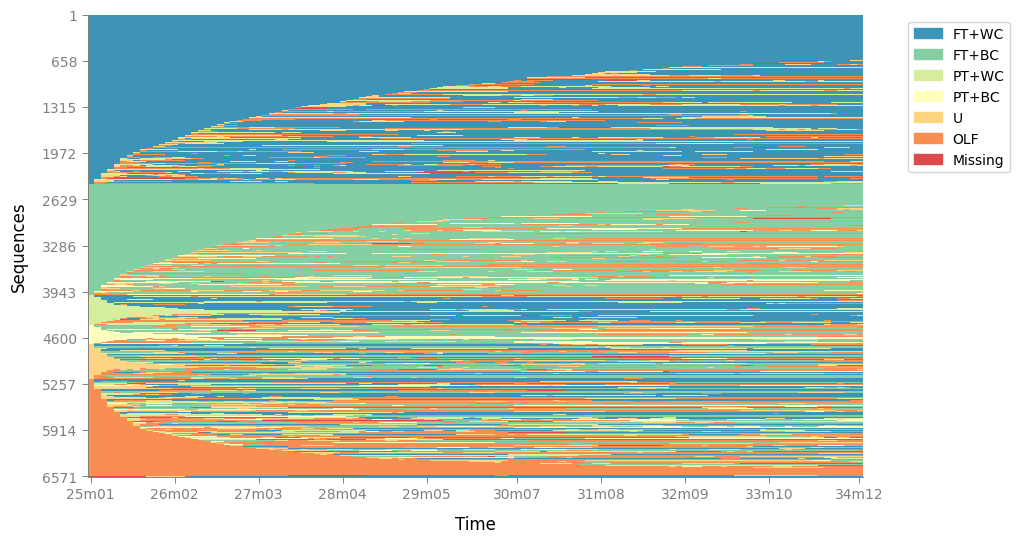

<Figure size 640x480 with 0 Axes>

In [4]:
plot_sequence_index(sequence_data, save_as='index_plot')
# order

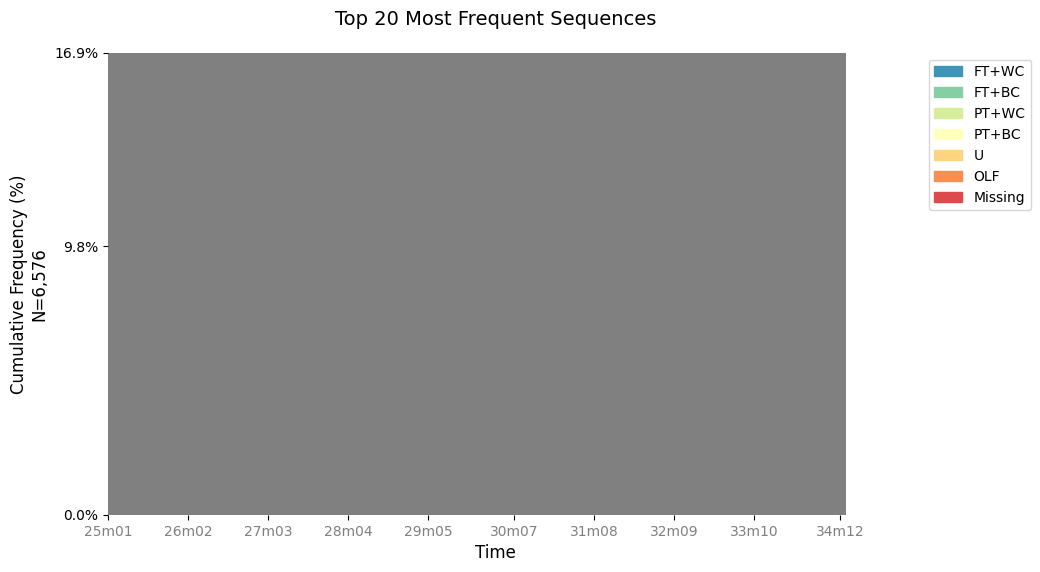

<Figure size 640x480 with 0 Axes>

In [5]:
plot_most_frequent_sequences(sequence_data, save_as='test', top_n=20)
# for the most top 3 sequences, they don't switch their states. They are working full time +white collar or full-time + blue collar, and part-time white-collar.

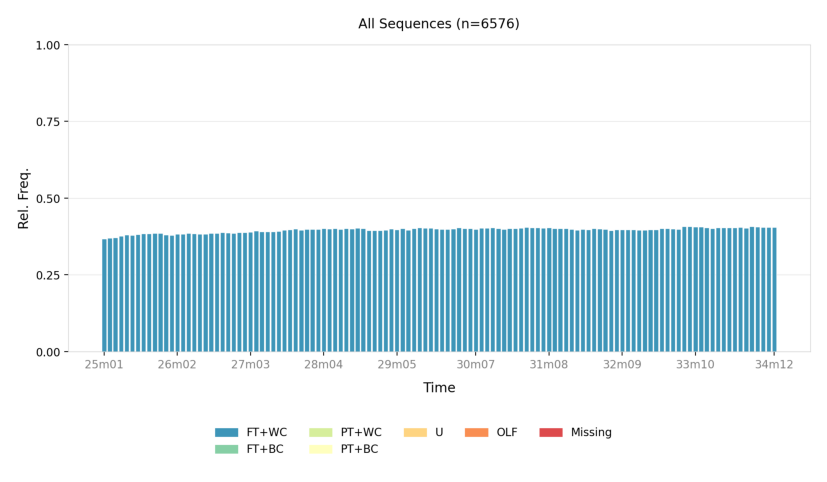

In [6]:
plot_modal_state(sequence_data)

In [7]:
plot_state_distribution(sequence_data)

KeyError: nan

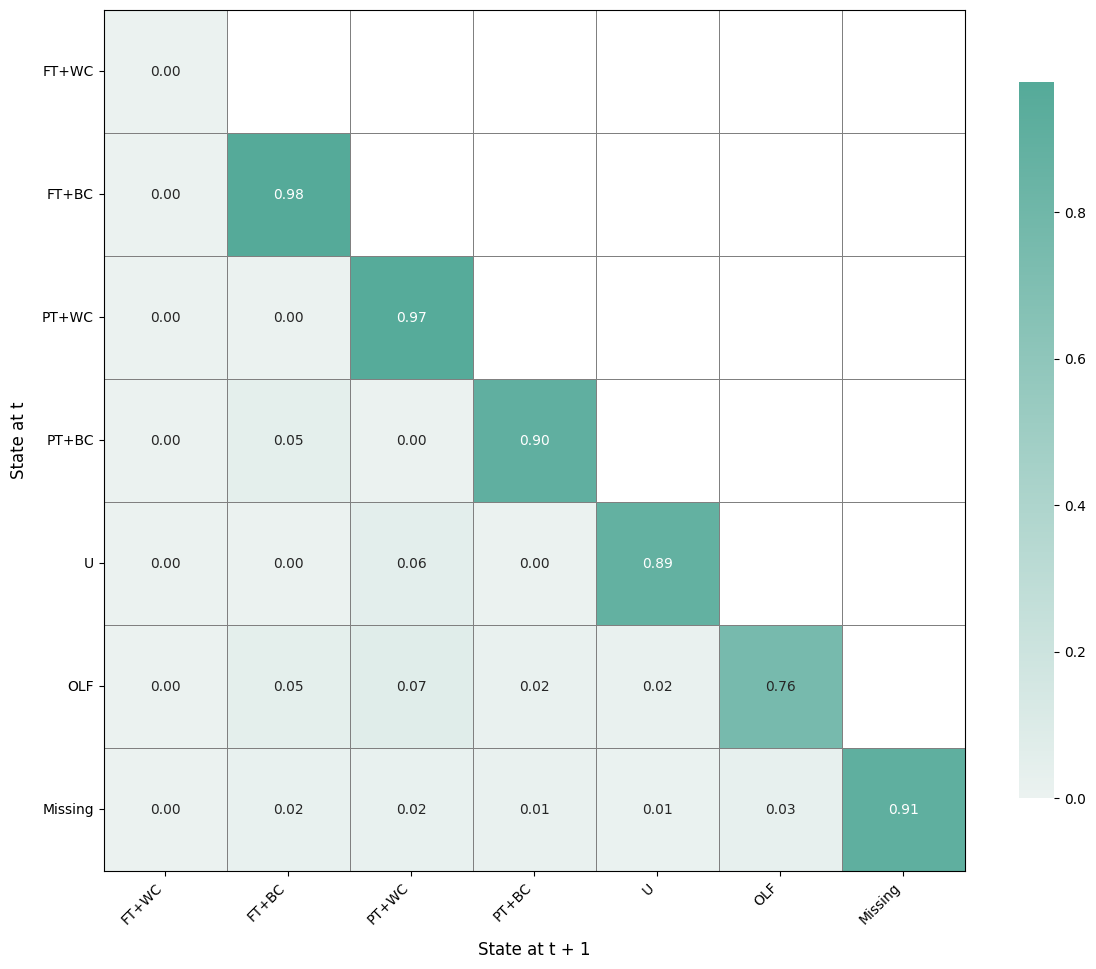

<Figure size 640x480 with 0 Axes>

In [8]:
plot_transition_matrix(sequence_data)

## OMspell

In [4]:
Omspell = get_distance_matrix(seqdata=sequence_data,
                                    method = 'OMspell',
                                    expcost = 0.5, indel =2,
                                    sm= "TRATE", with_missing=True)

[>] Processing 6576 sequences with 7 unique states.
[>] Transition-based substitution-cost matrix (TRATE) initiated...
  - Computing transition probabilities for: [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, nan]
[>] Indel cost generated.

[>] Identified 5415 unique spell sequences.
[>] Sequence spell length: min/max = 1 / 41.

[>] Starting Optimal Matching with spell(OMspell)...
[>] Computing all pairwise distances...
[>] Computed Successfully.


In [14]:
Omspell

,2,3,4,6,8,10,11,13,16,17,...,12300,12303,12304,12305,12514,12515,12516,12517,12558,12643
2,0.000000,127.415964,71.415964,1.965685,77.915964,131.967698,54.000000,62.915964,84.499995,19.000000,...,121.999995,121.999995,135.362040,87.965685,136.446077,139.446077,136.446077,125.946077,141.915964,81.915964
3,127.415964,0.000000,88.781533,125.500000,92.271541,117.253102,116.500000,113.500000,104.892724,128.445522,...,144.415964,144.415964,83.954388,88.347640,64.946072,108.845145,98.786311,124.297613,58.191051,107.338246
4,71.415964,88.781533,0.000000,69.500000,38.446077,122.349531,72.445522,51.500000,67.945522,65.500000,...,138.415964,138.415964,106.858940,68.272096,109.846542,117.826015,116.824730,129.297613,107.391598,52.341607
6,1.965685,125.500000,69.500000,0.000000,76.000000,131.967698,54.000000,62.879943,84.447202,19.000000,...,121.999995,121.999995,133.446077,86.000000,136.446077,139.446077,136.446077,125.946077,140.000000,81.879943
8,77.915964,92.271541,38.446077,76.000000,0.000000,126.771617,76.000000,49.000000,71.500000,79.000000,...,137.915964,137.915964,111.379460,64.914900,119.245413,114.237593,125.180985,131.797613,115.894054,56.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12515,139.446077,108.845145,117.826015,139.446077,114.237593,84.379943,138.392154,135.392154,134.786554,138.339356,...,124.500000,124.500000,80.920074,124.359846,81.915964,0.000000,79.879943,96.500000,108.334326,132.327549
12516,136.446077,98.786311,116.824730,136.446077,125.180985,70.319649,129.413774,133.413774,131.786554,135.339356,...,91.500000,91.500000,99.852863,123.326628,81.848435,79.879943,0.000000,74.465685,100.252001,130.255372
12517,125.946077,124.297613,129.297613,125.946077,131.797613,77.879943,124.913774,121.967693,125.327131,124.893274,...,38.000000,38.000000,103.331927,117.881644,107.331927,96.500000,74.465685,0.000000,128.881644,129.809233
12558,141.915964,58.191051,107.391598,140.000000,115.894054,121.791526,135.000000,132.000000,125.446077,134.947202,...,146.915964,146.915964,88.454388,115.837675,57.379938,108.334326,100.252001,128.881644,0.000000,122.808179


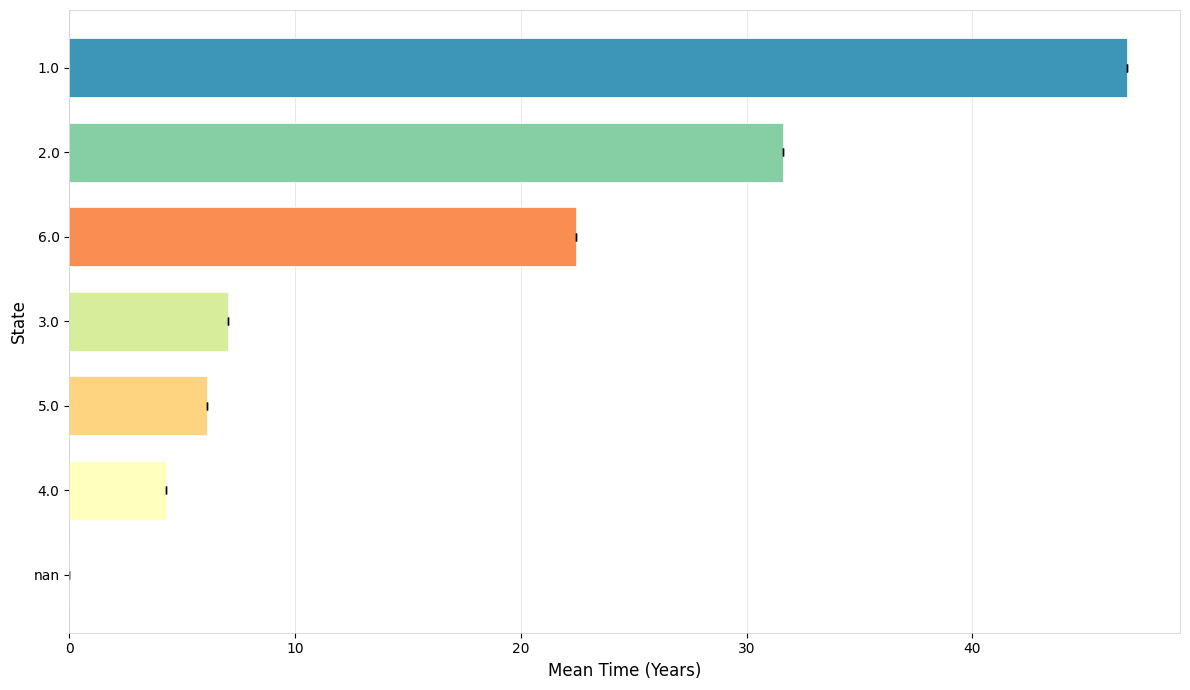

<Figure size 640x480 with 0 Axes>

In [15]:
plot_mean_time(sequence_data, save_as='mean_time')

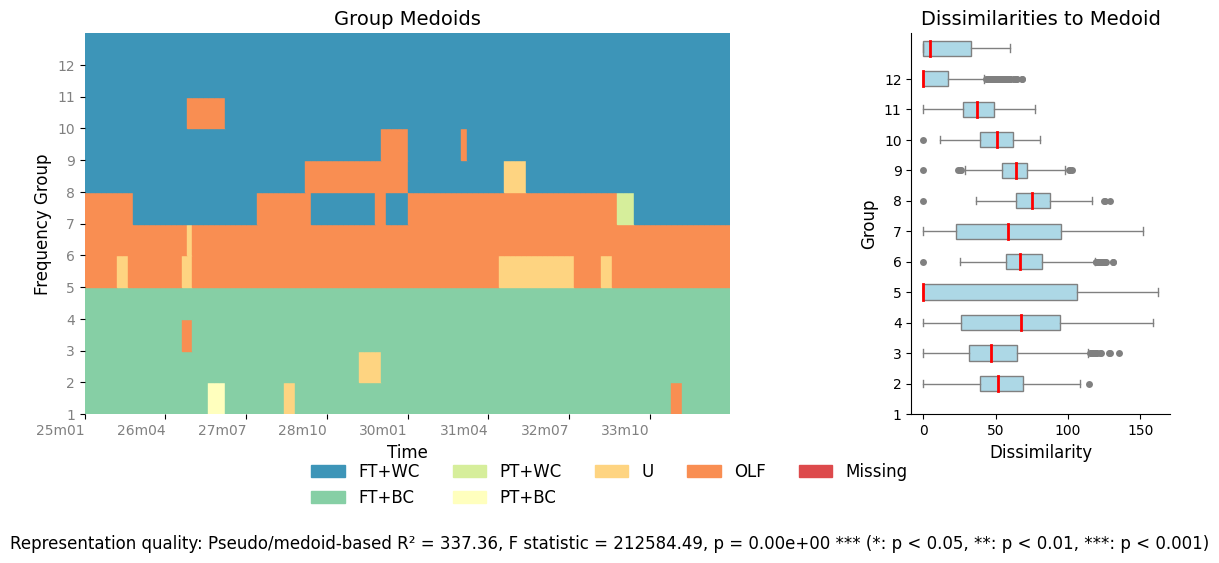

<Figure size 640x480 with 0 Axes>

In [5]:
plot_relative_frequency(seqdata=sequence_data, 
                        distance_matrix=Omspell, 
                        num_groups=12, 
                        dpi=200, 
                        # save_as='relative_frequency_plot'
                        )

[>] Converting DataFrame to NumPy array...


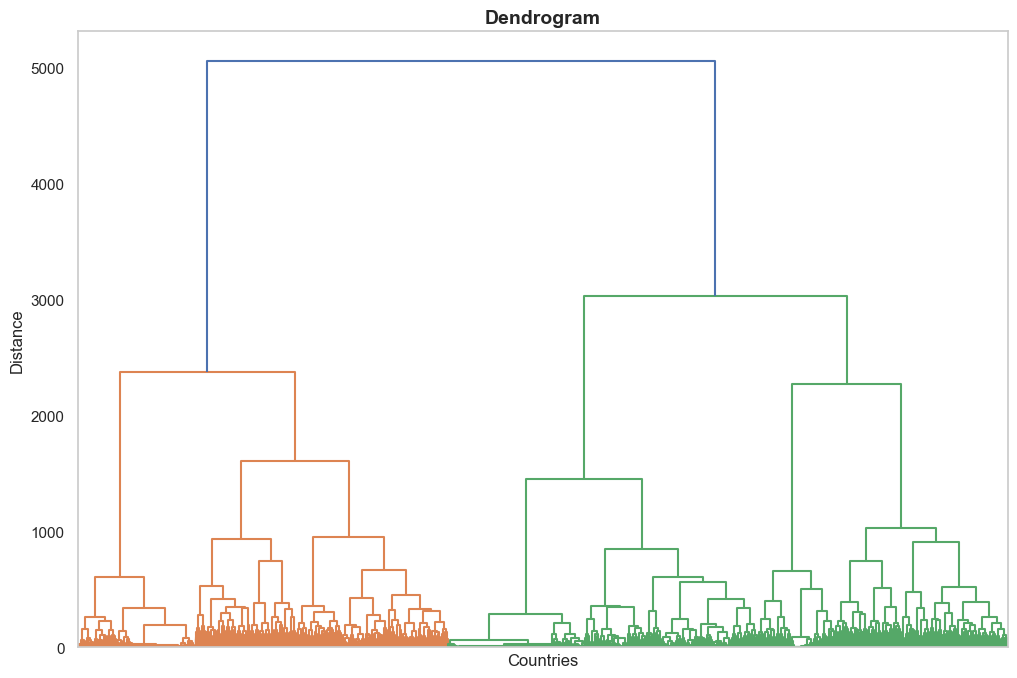

<Figure size 640x480 with 0 Axes>

In [6]:

cluster = Cluster(Omspell, sequence_data.ids, clustering_method='ward')
cluster.plot_dendrogram(xlabel="Countries", ylabel="Distance")
# Hierarchical: combine similar individuals together (bottom-up), stable, calculate variation, how you two get combined as a branch based on variation
# PAM: several dots, how many clusters you want (k-medoid choose the distance that minimize the distance between local nods), randomly choose one.
# kmean: doesn't identify real representative nods


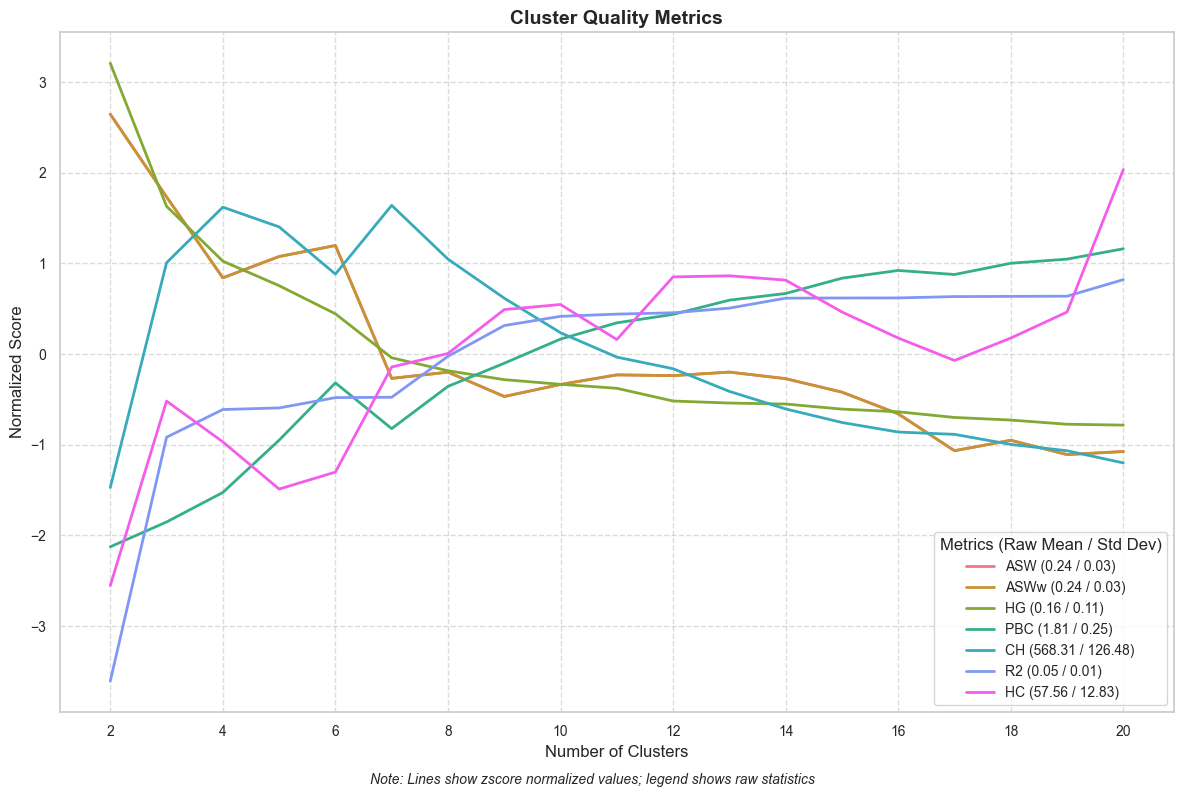

  Metric  Opt. Clusters  Opt. Value  Z-Score Norm.  Min-Max Norm.
0    ASW              2    2.645115       2.645115            1.0
1   ASWw              2    2.645115       2.645115            1.0
2     HG              2    3.207421       3.207421            1.0
3    PBC             20    1.160926       1.160926            1.0
4     CH              7    1.639663       1.639663            1.0
5     R2             20    0.820409       0.820409            1.0
6     HC             20    2.035233       2.035233            1.0


<Figure size 640x480 with 0 Axes>

In [7]:
# Create a ClusterQuality object to evaluate clustering quality
cluster_quality = ClusterQuality(cluster)
cluster_quality.compute_cluster_quality_scores()
cluster_quality.plot_combined_scores(norm='zscore', save_as='combined_scores')
summary_table = cluster_quality.get_metrics_table()
print(summary_table)

      Entity ID  Cluster ID
0             2           3
1             3           2
2             4           3
3             6           3
4             8           3
...         ...         ...
6571      12515           2
6572      12516           2
6573      12517           1
6574      12558           2
6575      12643           3

[6576 rows x 2 columns]
   Cluster  Count  Percentage
0        1    834       12.68
1        2   1782       27.10
2        3   2197       33.41
3        4   1763       26.81


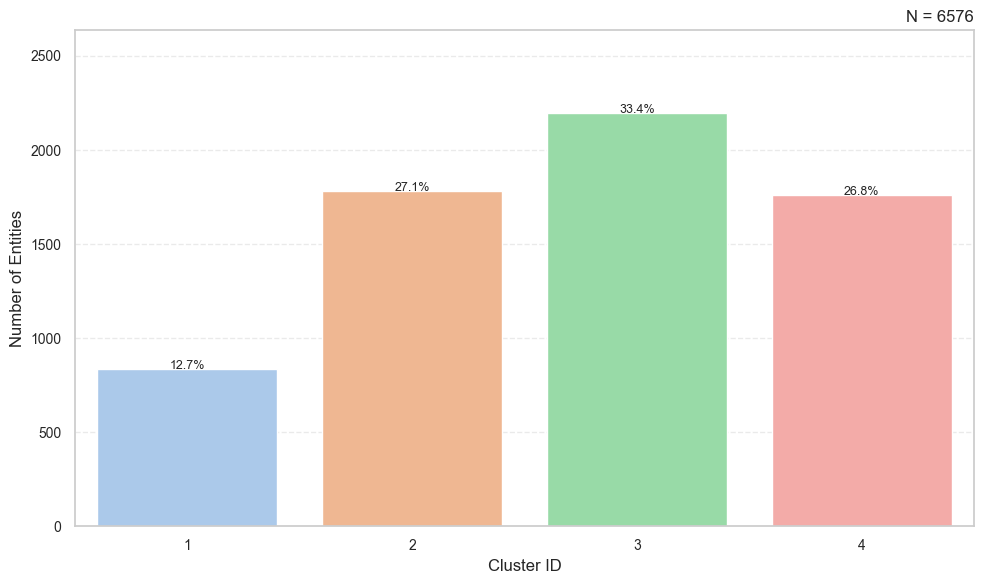

<Figure size 640x480 with 0 Axes>

In [9]:

cluster_results = ClusterResults(cluster)
membership_table = cluster_results.get_cluster_memberships(num_clusters=4)
print(membership_table)
distribution = cluster_results.get_cluster_distribution(num_clusters=4)
print(distribution)
cluster_results.plot_cluster_distribution(num_clusters=4, save_as="distribution.png", title=None)

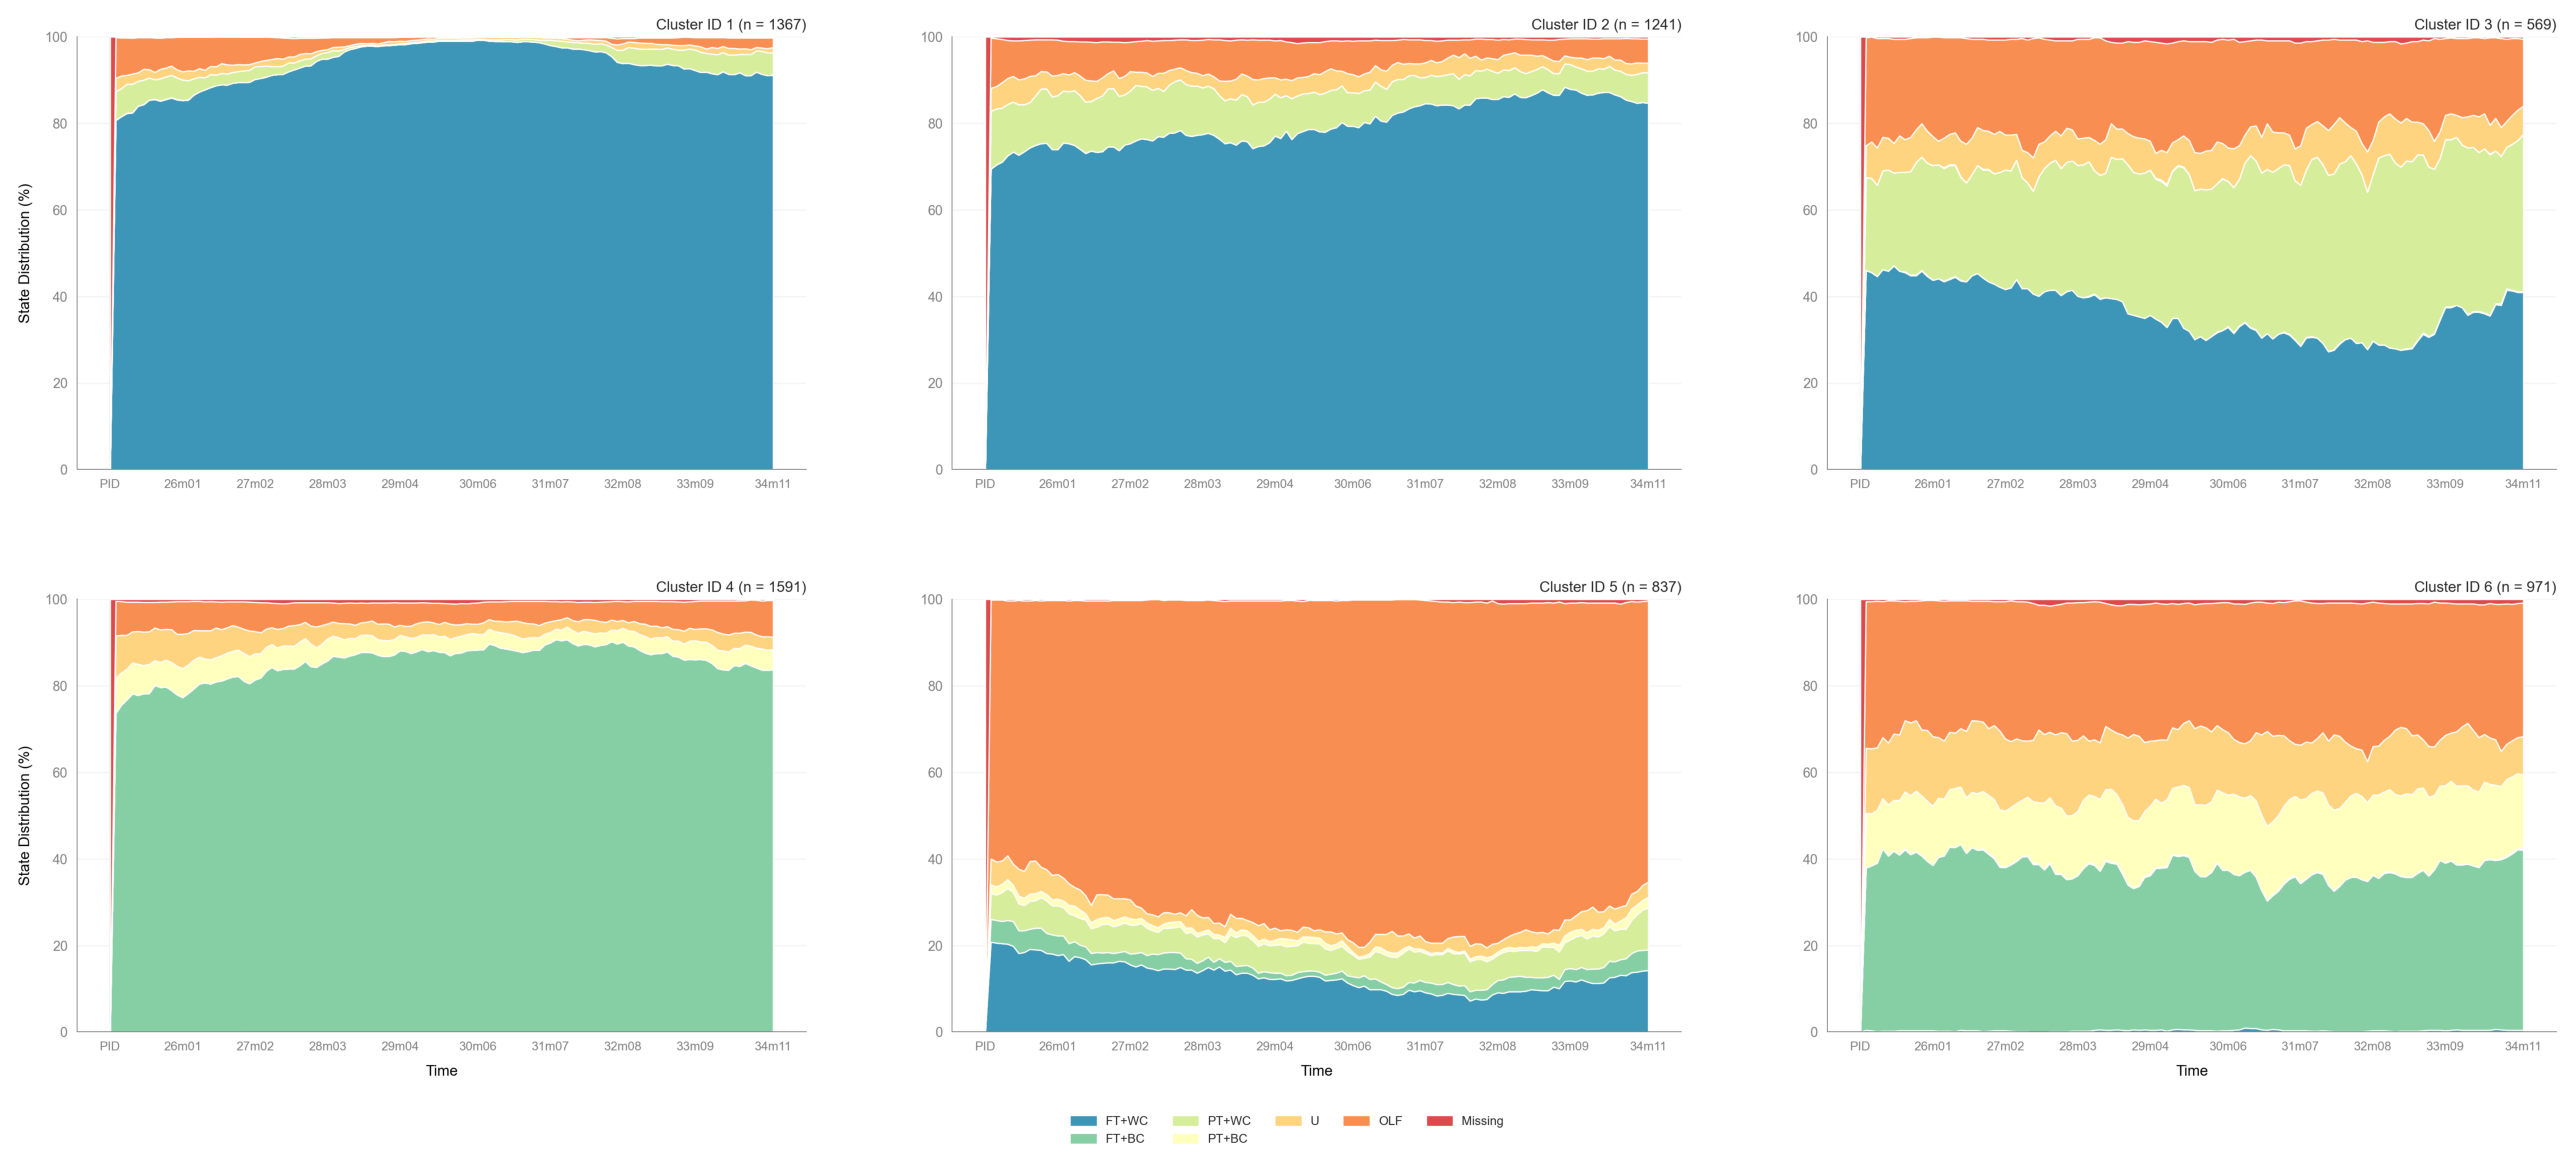

In [27]:
plot_state_distribution(seqdata=sequence_data,
                        id_group_df=membership_table,
                        categories='Cluster ID',
                        save_as='cluster_state_distribution_plot')

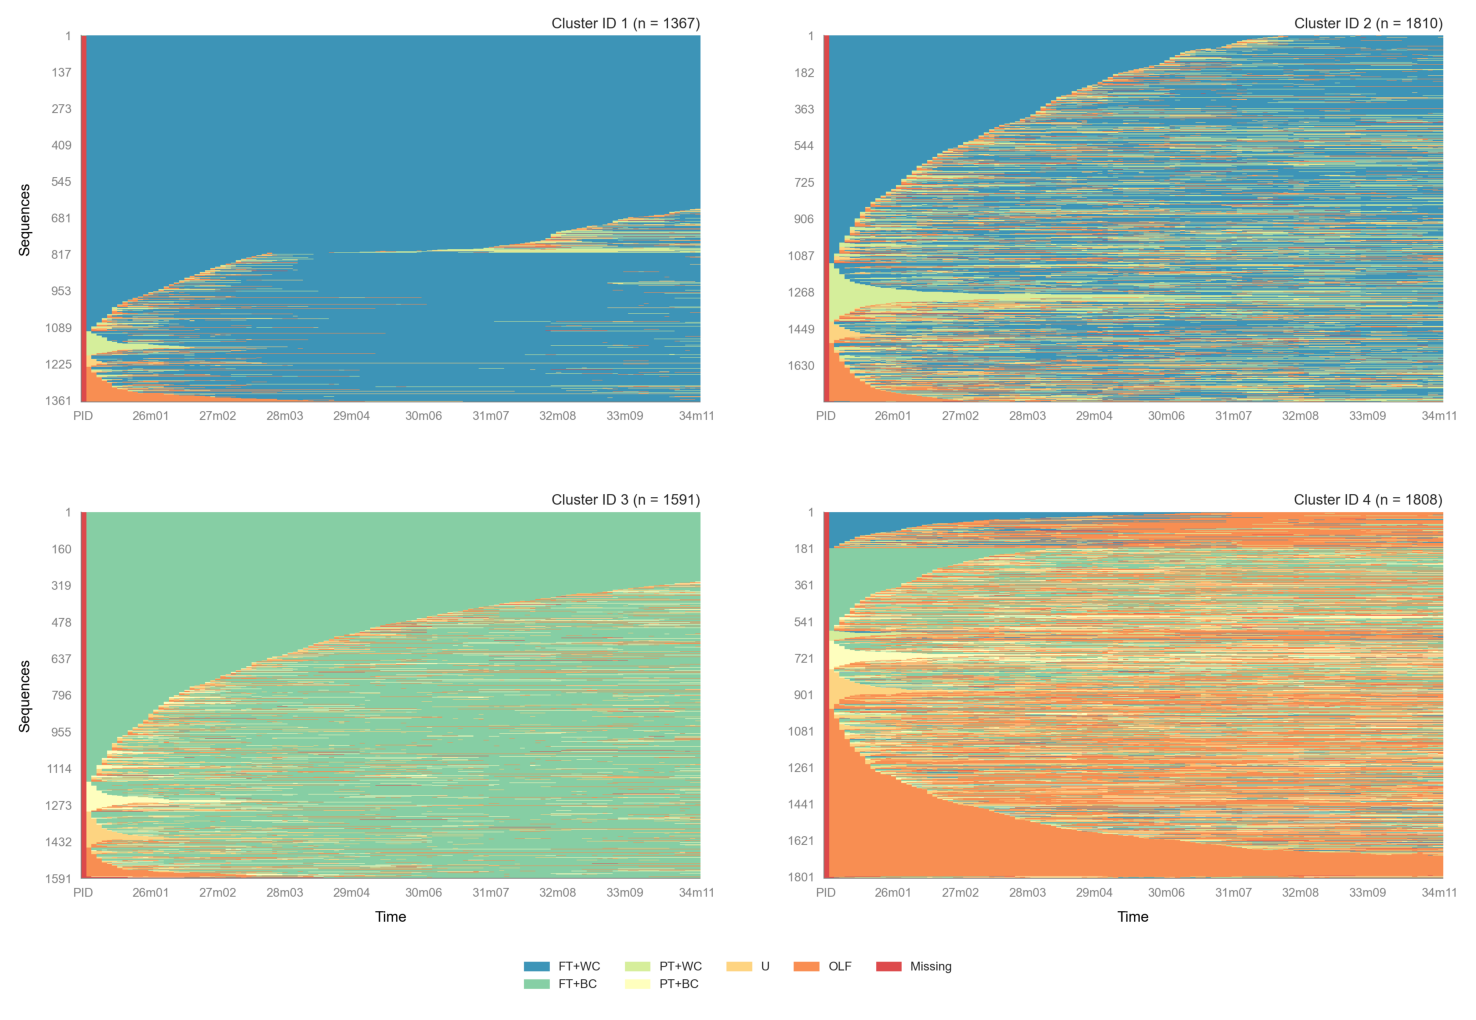

In [19]:
plot_sequence_index(seqdata=sequence_data,
                    id_group_df=membership_table,
                    categories='Cluster ID',
                    nrows=2,
                    ncols=2,
                    save_as='cluster_index_plot_4')


      Entity ID  Cluster ID
0             2           1
1             3           6
2             4           2
3             6           1
4             8           2
...         ...         ...
6571      12515           6
6572      12516           4
6573      12517           4
6574      12558           6
6575      12643           2

[6576 rows x 2 columns]
   Cluster  Count  Percentage
0        1   1367       20.79
1        2   1241       18.87
2        3    569        8.65
3        4   1591       24.19
4        5    837       12.73
5        6    971       14.77


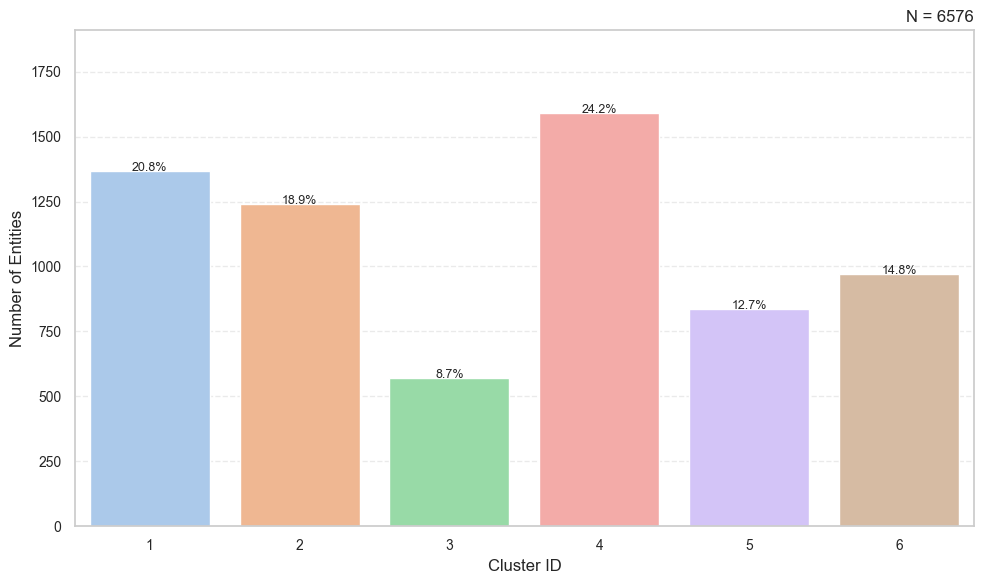

<Figure size 640x480 with 0 Axes>

In [20]:
cluster_results = ClusterResults(cluster)
membership_table = cluster_results.get_cluster_memberships(num_clusters=6)
print(membership_table)
distribution = cluster_results.get_cluster_distribution(num_clusters=6)
print(distribution)
cluster_results.plot_cluster_distribution(num_clusters=6, save_as="distribution.png", title=None)

      Entity ID  Cluster ID
0             2           1
1             3           6
2             4           2
3             6           1
4             8           2
...         ...         ...
6571      12515           6
6572      12516           4
6573      12517           4
6574      12558           6
6575      12643           2

[6576 rows x 2 columns]
   Cluster  Count  Percentage
0        1   1367       20.79
1        2   1241       18.87
2        3    569        8.65
3        4   1591       24.19
4        5    837       12.73
5        6    971       14.77


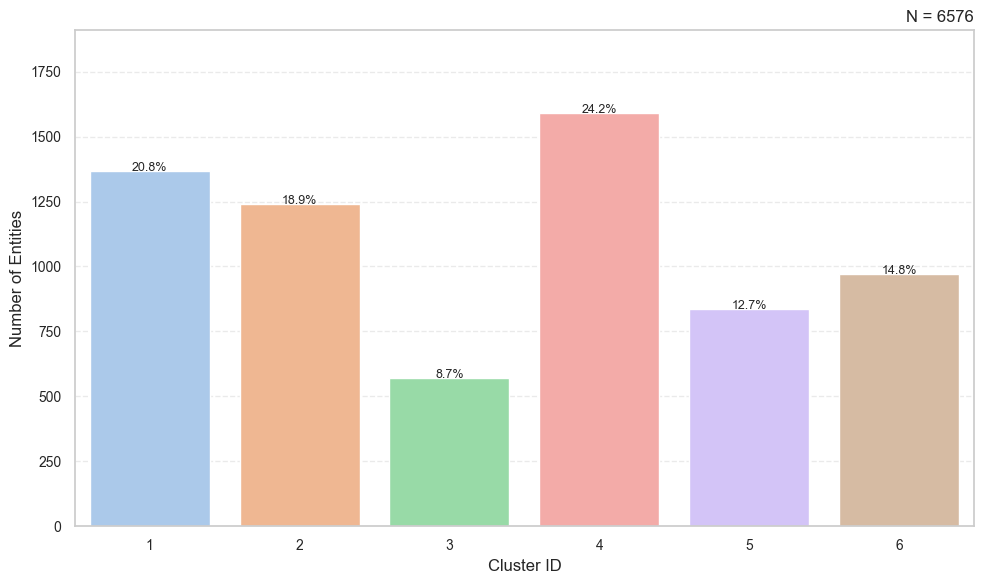

<Figure size 640x480 with 0 Axes>

In [21]:
cluster_results = ClusterResults(cluster)
membership_table = cluster_results.get_cluster_memberships(num_clusters=6)
print(membership_table)
distribution = cluster_results.get_cluster_distribution(num_clusters=6)
print(distribution)
cluster_results.plot_cluster_distribution(num_clusters=6, save_as="distribution.png", title=None)

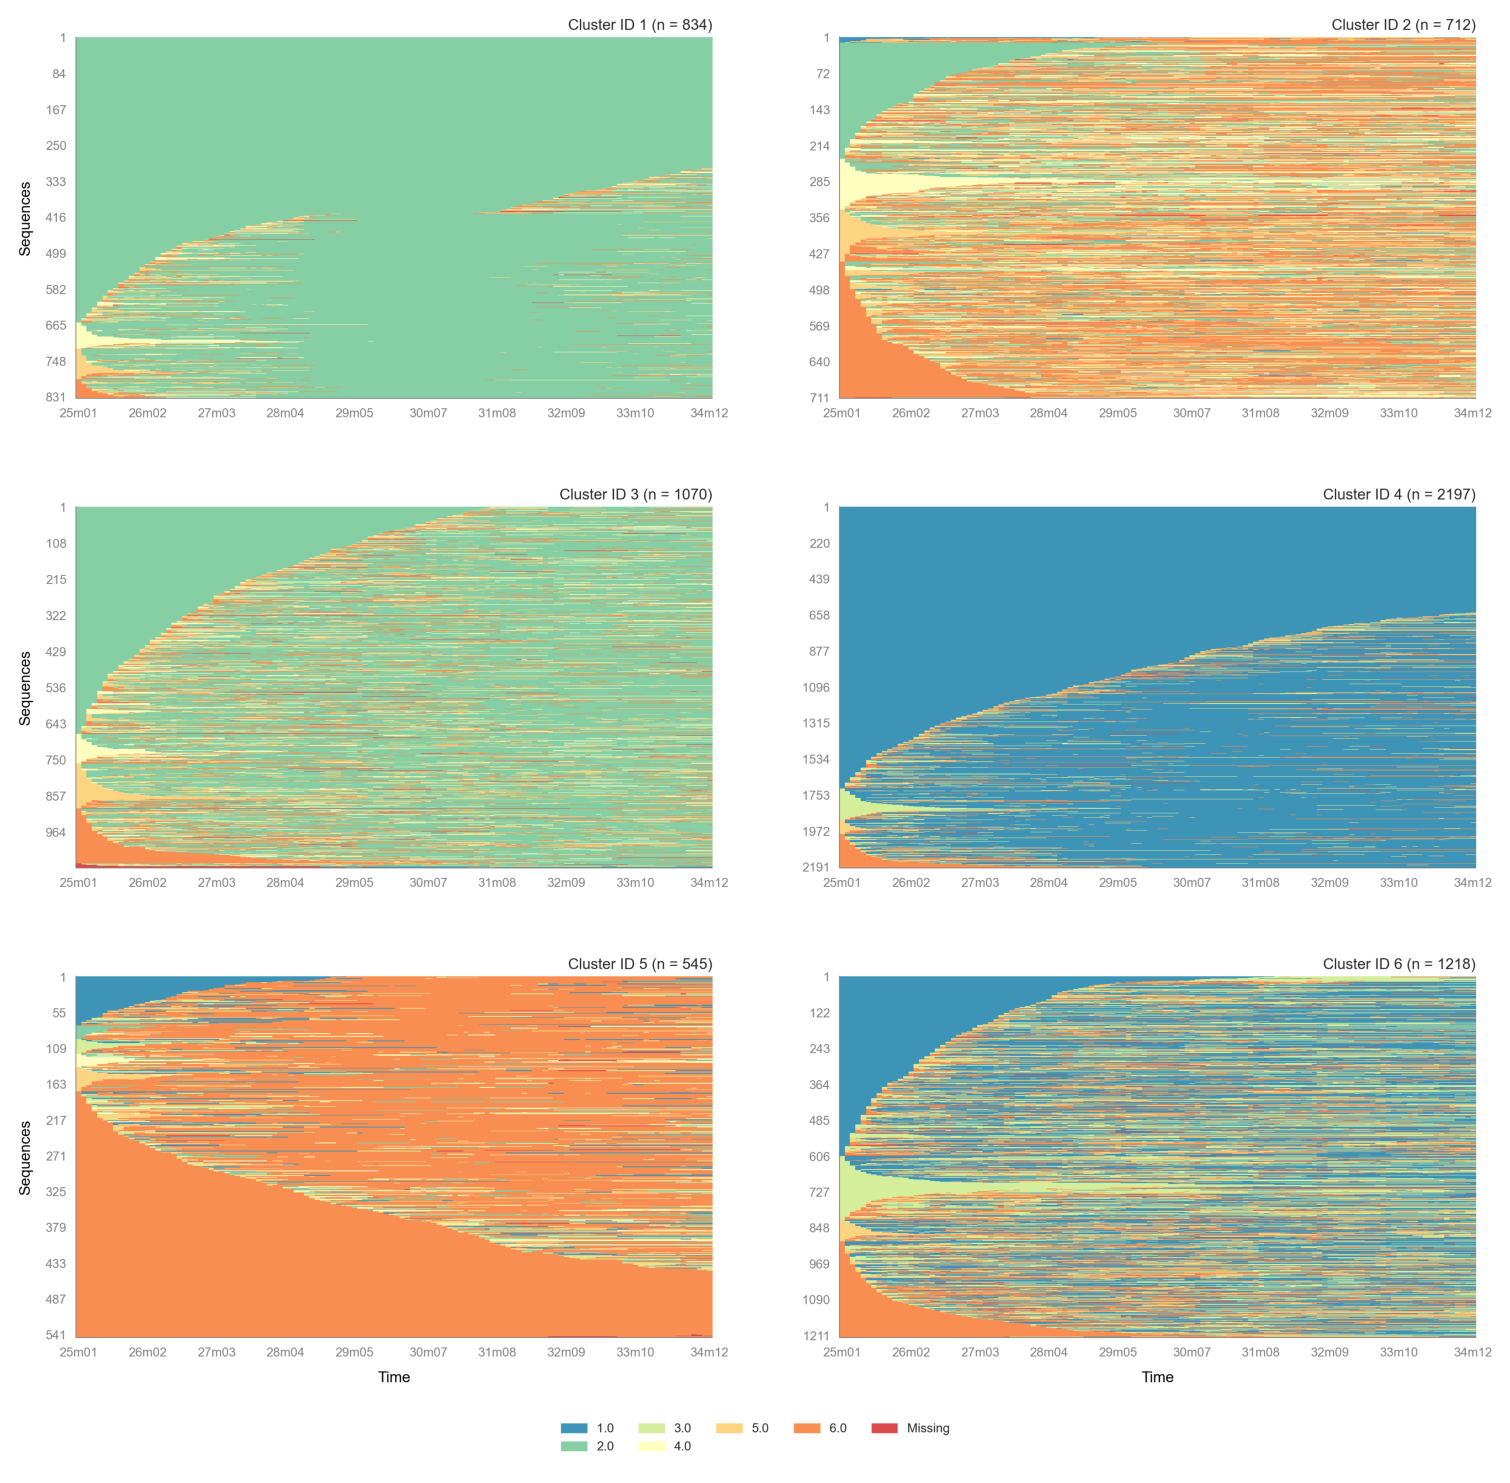

In [34]:
plot_sequence_index(seqdata=sequence_data,
                    id_group_df=membership_table,
                    categories='Cluster ID',
                    nrows=3,
                    ncols=2,
                    save_as='cluster_index_plot_6')

## wald cluster

In [ ]:
cluster = Cluster(Omspell, sequence_data, clustering_method='PAM')
